In [1]:
#!pip install CommonRegex
#!pip install pgeocode

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pytesseract 
from PIL import Image, ImageOps
import re
from commonregex import CommonRegex
import pgeocode
from nltk.corpus import words
import os

#texts_df = pd.read_csv('texts.csv')
#folder=(r"images/large-receipt-image-dataset-SRD")

url = r'data//text.txt'
with open(url,encoding="utf8") as f:
    lines = f.readlines()
compressed = ''.join(lines)
text_list = compressed.split('\x0c\n')



In [3]:
print(text_list[0])

    
  
  
  

GREEN FIELD
5305 E PACIFIC COAST HWY
Long Beach, CA 90804
(S62) 597-0906

Server: Francis Station: 4
Order #: 69923 Dine In
Table: B11 Guests: 2
1 Coffee 3.00
2 Lunch 45.90
1 Coke 3.00
SUB TOTAL: 51.90
Tax 1:

TOTAL: $56.58

5/26/2016 12:53:10 PM

INAH

THANK YOU!

 



In [4]:
#Change this function to extract ITEMS (with their respective prices)
"""After geting the prices, locate their boxes, search for boxes that have similar height, assume those are 
the names of the items. Then look for the largest box (or the box on top), assume those are the names of the shops). """

def extract_prices(text):
    if len(text)>0:
        prices = CommonRegex(text).prices
        if len(prices) > 0:
            return max(prices)
    return np.nan

In [5]:
def extract_geo(text):
    #zip_code 
    if len(text) == 0:
        return np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
    
    us_zip = r'(\d{5}\-?\d{0,4})'
    zip_code = re.search(us_zip, text)
    try:
        zip_code = zip_code[0]
        nomi = pgeocode.Nominatim('us')
        geodata = nomi.query_postal_code(zip_code)
        longitude = geodata['longitude']
        latitude = geodata['latitude']
        state = geodata['state_name']
        county = geodata['county_name']
    except:
        zip_code = np.nan
        longitude = np.nan
        latitude = np.nan
        state = np.nan
        county = np.nan
        
    
    address = CommonRegex(text).street_addresses
    if len(address) == 1:
        address =  address[0]
    else:
        address = np.nan

        
    return zip_code, longitude, latitude, address, state, county
    
    

In [6]:
def extract_time(text):
    if len(text)>0:
        times = CommonRegex(text).times
        if len(times) == 1:
            return times[0]
        return np.nan

In [7]:
text_list[192]

''

In [8]:
#texts_df = pd.read_csv('texts.csv')
geos = []
times = []
counter = 0
for text in text_list:
    print(counter)
    counter+=1
    times.append(extract_time(text))
    geos.append(extract_geo(text))



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [9]:
df = pd.DataFrame(data = geos, columns = ['Zipcode','Latitude', 'Longitude', 'Address', 'State', 'County' ])
df['Time'] = times
df

,Zipcode,Latitude,Longitude,Address,State,County,Time
0,90804,-118.1357,33.7857,5305 E PACIFIC COAST HWY,California,Los Angeles,12:53
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,378752,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90280,-118.2013,33.9462,8510 GARFIELD AVE.,California,Los Angeles,11:19 AM
...,...,...,...,...,...,...,...
196,NaN,NaN,NaN,NaN,NaN,NaN,6:06
197,002004306,NaN,NaN,NaN,NaN,NaN,12:41
198,33140,-80.1337,25.8198,1 4959 6ST,Florida,Miami-Dade,8:03PM
199,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
prices = []
for text in text_list:
    prices.append(extract_prices(text))
df['prices'] = prices


#database = df.explode('prices')
#database.reset_index(inplace = True)

In [11]:
df.head()

,Zipcode,Latitude,Longitude,Address,State,County,Time,prices
0,90804,-118.1357,33.7857,5305 E PACIFIC COAST HWY,California,Los Angeles,12:53,$56.58
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,378752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90280,-118.2013,33.9462,8510 GARFIELD AVE.,California,Los Angeles,11:19 AM,$8.39


181

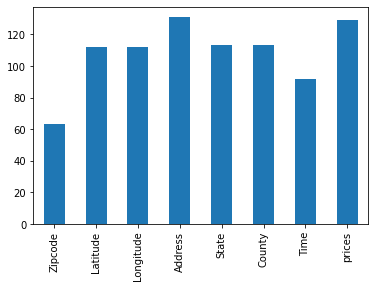

In [12]:
df.isna().sum().plot(kind = 'bar')
sum(df.T.isna().any())

In [13]:

def extract_store_names(text):
    string = text.strip()
    if len(string) >0:
        return re.search('[^(\n)]+', string, flags=0)[0]
    else:
        return np.nan




In [14]:
stores = []
counter = 0
for text in text_list:
    print(counter)
    counter+=1
    stores.append(extract_store_names(text))
df['Store Names'] = stores


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [21]:
df[df['State']=='California'].value_counts('County')

County
Los Angeles    16
Santa Clara     2
Alameda         1
Orange          1
Placer          1
Sacramento      1
San Diego       1
San Mateo       1
dtype: int64

In [16]:
df.to_csv(r'data\structured_data.csv')